In [1]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import csv
import json

In [2]:
def generateDataset(rho,n=100):
    r = np.array([[1, rho],[rho, 1]])
    y = np.random.multivariate_normal([0.0,0.0], r, size=n)
#     print(y)
#     y = y - np.mean(y,axis=0)
#     print(np.mean(y,axis=0))
    x = y[:,0]
    y= y[:,1]
    x = x - np.mean(x)
    y = y - np.mean(y)
    plt.scatter(x,y)
    plt.show()
    d = [{"x":i,"y":j} for i,j in zip(x,y)]
    calcRho = pearsonr(x,y)
    return({"data":d,"N":n,"rho":rho,"calcRho":calcRho[0]})

In [40]:
with open("variables.csv",encoding="UTF-8") as csvFile:
    csvData = [i for i in csv.DictReader(csvFile)]

In [41]:
csvDf = pd.read_csv("variables.csv")

In [42]:
csvDf

,Unit of observation,X,Y,True relationship,Political?,rho,set
0,diamonds,Weight,Price,Strongly positive,No,0.9,1
1,cities,Temperature,Crime rate,Positive,No,0.4,1
2,people,Yearly income,Height,None,No,0.0,1
3,people,Exercise amount,Body weight,Negative,No,-0.4,1
4,cities,Temperature,Sales of Mittens,Strongly Negative,No,-0.9,1
5,countries,Government spending,Budget deficit,Strongly positive,Yes,0.9,2
6,countries,Immigrant population,Economic growth,Positive,Yes,0.4,2
7,cities,Income tax rate,Poverty rate,None,Yes,0.0,2
8,companies,Labor union participation,Corporate profits,Negative,Yes,-0.4,2
9,cities,Vaccination rate,Rate of illness,Strongly Negative,Yes,-0.9,2


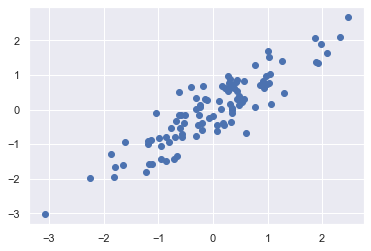

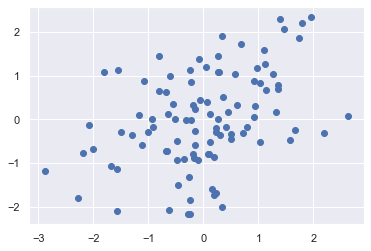

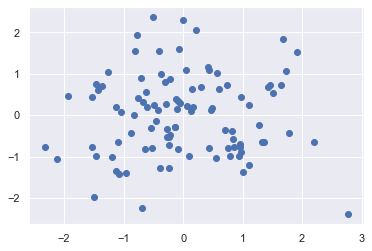

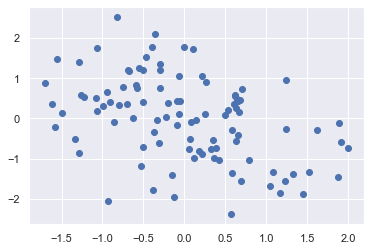

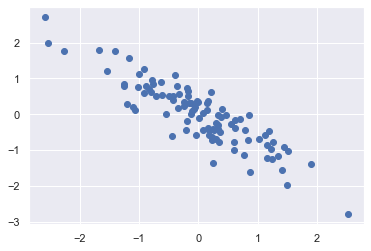

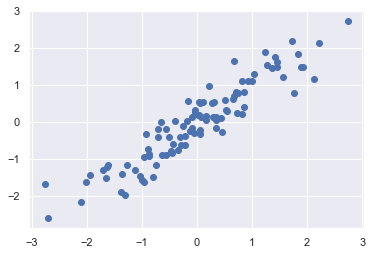

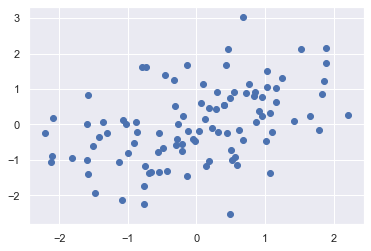

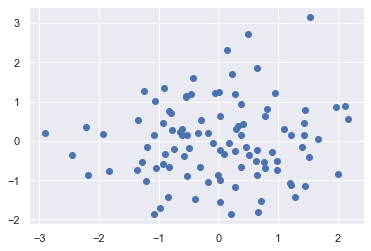

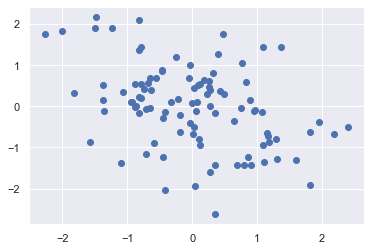

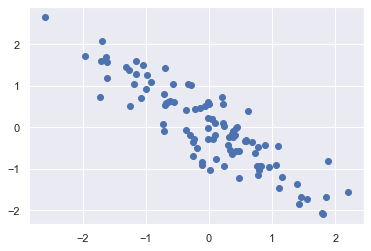

In [43]:
allData = {}
for idx,row in csvDf.iterrows():
    rho = float(row["rho"])
    vars = (row["X"],row["Y"])
    data = generateDataset(rho)
    key = "_".join([i for i in vars])
    setID = row["set"]
    political = row["Political?"]
    unit = row["Unit of observation"]
    allData[key] = {
        "data":data,
        "vars":vars,
        "rho": rho,
        "set": setID,
        "political":political,
        "unitt" : unit
    }

In [27]:
allData.keys()

dict_keys(['Weight_Price', 'Temperature_Crime rate', 'Yearly income_Height', 'Exercise amount_Body weight', 'Temperature_Sales of Mittens', 'Government spending_Budget deficit', 'Immigrant population_Economic growth', 'Income tax rate_Poverty rate', 'Labor union participation_Corporate profits', 'Vaccination rate_Rate of illness'])

In [44]:
with open("finalSimData.json","w") as jsonFile:
    jsonFile.write(json.dumps(allData))

-0.9


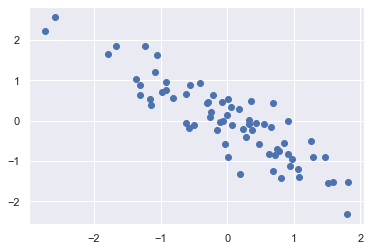

-0.8


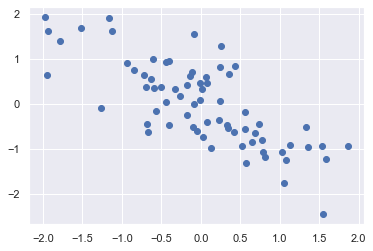

-0.7000000000000001


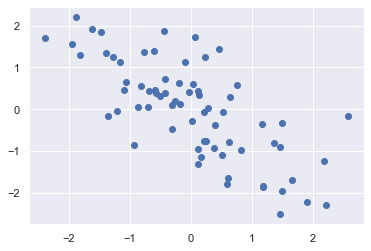

-0.6000000000000001


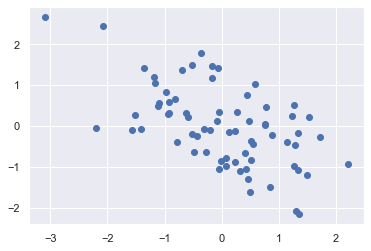

-0.5000000000000001


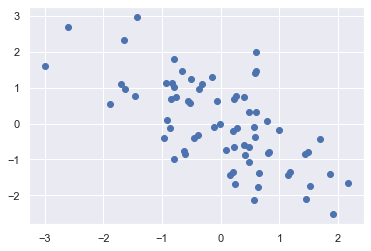

-0.40000000000000013


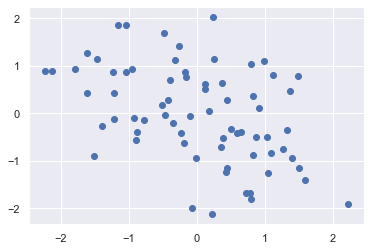

-0.30000000000000016


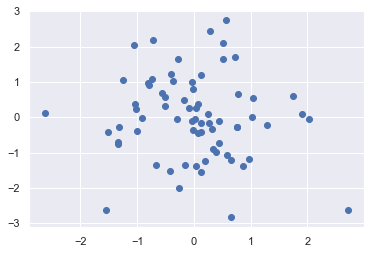

-0.20000000000000018


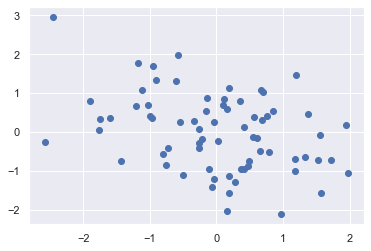

-0.1000000000000002


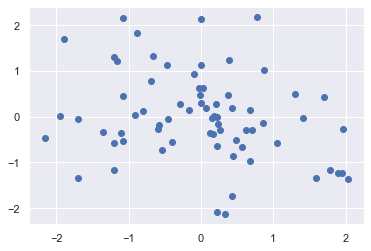

0.0


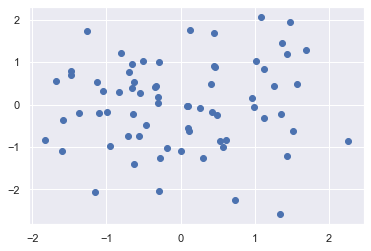

0.09999999999999976


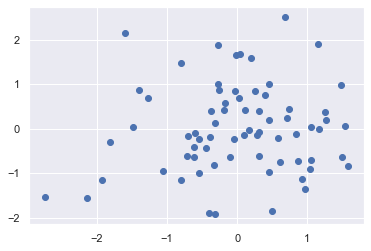

0.19999999999999962


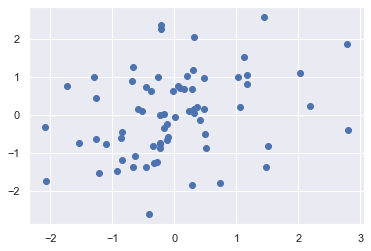

0.2999999999999997


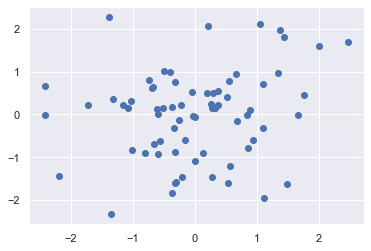

0.3999999999999998


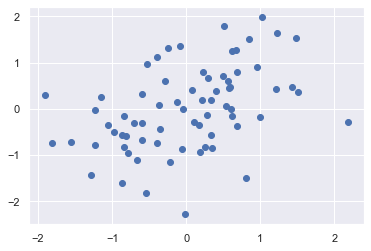

0.49999999999999967


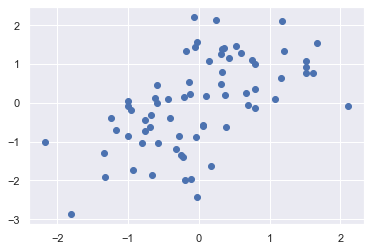

0.5999999999999995


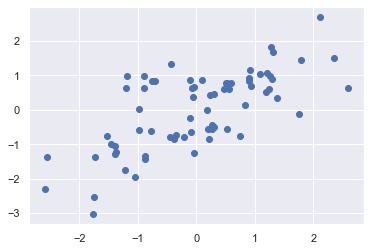

0.6999999999999996


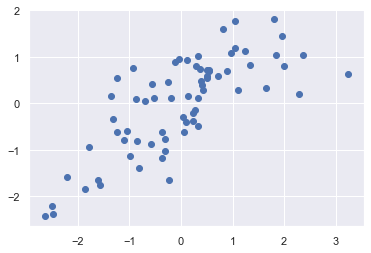

0.7999999999999997


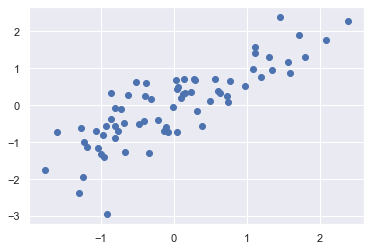

0.8999999999999996


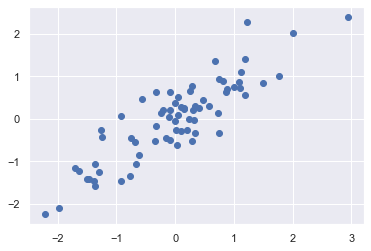

In [7]:
testData = {}
for rho in np.arange(-0.9,0.91,0.1):
    
    if np.abs(rho) < 0.000001:
        rho = 0.0
    print(rho)
    data = generateDataset(rho,n=70)
    testData[rho] = data

In [8]:
with open("testDataBand.json","w") as jsonFile:
    jsonFile.write(json.dumps(testData))